# SVM Exercises

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# YOUR CODE HERE
data = pd.read_csv(url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)

data = data.dropna(axis=0).reset_index(drop=True)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
5,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
6,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
7,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
8,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
9,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


Split data into training, validation, and test sets with a test size of 25%

In [ ]:
# YOUR CODE HERE
x_cols = names[:-1]
y_col = names[-1]


X_train, X_test, y_train, y_test = train_test_split(data[x_cols], data[y_col], test_size=.25, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.25, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [ ]:
# YOUR CODE HERE

svm_high = SVC(gamma=1.0)
svm_high.fit(X_train, y_train)

SVC(gamma=1.0)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE
y_train_pred_high = svm_high.predict(X_train)
y_val_pred_high = svm_high.predict(X_val)

print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_high)*100)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_high)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.56756756756756


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [ ]:
# YOUR CODE HERE
svm_low = SVC(gamma=0.001)
svm_low.fit(X_train, y_train)

SVC(gamma=0.001)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE
y_train_pred_low = svm_low.predict(X_train)
y_val_pred_low = svm_low.predict(X_val)

print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_low)*100)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_low)*100)

Training Accuracy is  87.27272727272727
Validation Accuracy is  74.32432432432432


Explain the accuracy results below. 

For this data, the gamma values did affect the accuracies since they are different. 

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

In [ ]:
# YOUR CODE HERE
print("low gamma")
low_cm = metrics.confusion_matrix(y_val, y_val_pred_low)


low gamma


In [ ]:
print("high gamma")
high_cm = metrics.confusion_matrix(y_val, y_val_pred_high)

high gamma


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


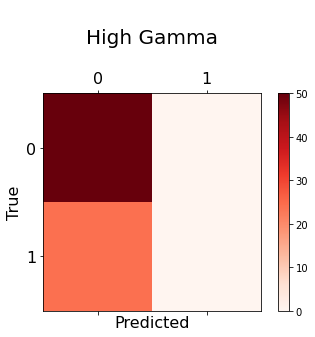

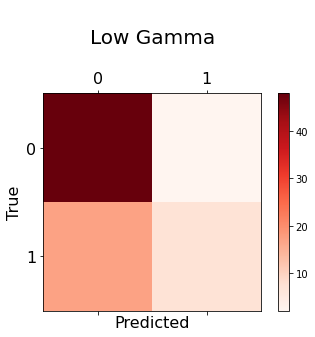

In [ ]:
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

plot_cmatrix(high_cm, labels = [0, 1], title = "High Gamma")
plot_cmatrix(low_cm, labels = [0, 1], title = "Low Gamma")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6eb312d5-62b7-42e3-a19a-ad8b15b7fa98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>